In [1]:
import babet as bb
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from cmcrameri import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask

In [2]:
dates_past = ['19631106', '19621106', '19511112', '19761014', '19650926', '19771008', '19581001', '19731014', '19591130', '19791014', '19661105', '19601020', '19501121', '19521126', '19671102', '19611007', '19681102', '19641011', '19721120', '19571105', '19551019', '19740902', '19701119', '19711129', '19691114']
dates_past = pd.to_datetime([str(date) for date in dates_past], format='%Y%m%d')
dates_present = ['20201003', '19990920', '20191104', '19931002', '20001106', '20101109', '19950907', '20021115', '20041029', '20031031', '20081129', '20150916', '20181030', '20061020', '19971106', '20091022', '19961119', '20120925', '19921028', '20141115', '19941022', '20111104', '19981103', '20161121', '20051126']
dates_present = pd.to_datetime([str(date) for date in dates_present], format='%Y%m%d')

In [3]:
# Data on AOPP
# precip 
base_dir = "/network/group/aopp/met_data/MET001_ERA5/data/pr/day/pr_day_ERA5_0.5x0.5_*"
era5_all_pr = xr.open_mfdataset(base_dir, combine='by_coords')

# surface pressure
base_dir = "/network/group/aopp/met_data/MET001_ERA5/data/psl/day/psl_day_ERA5_0.5x0.5_*"
era5_all_psl = xr.open_mfdataset(base_dir, combine='by_coords')

# surface pressure
base_dir = "/network/group/aopp/met_data/MET001_ERA5/data/tos/day/tos_day_ERA5_0.5x0.5_*"
era5_all_tos = xr.open_mfdataset(base_dir, combine='by_coords')

era5_all = xr.merge([era5_all_pr, era5_all_psl, era5_all_tos])

# humidity
# base_dir = "/network/group/aopp/met_data/MET001_ERA5/data/hus/day/hus_day_ERA5_0.5x0.5_*"
# era5_all_hus = xr.open_mfdataset(base_dir, combine='by_coords')

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

In [4]:
# # Data on JASMIN/CEDA
# base_dir = '/badc/ecmwf-era5/data/oper/an_sfc/'
# era5_all_psl = xr.open_mfdataset(base_dir, combine='by_coords')

In [5]:
# select dates in dates_past and dates_present
era5 = {}
era5['pi'] = era5_all.sel(time=dates_past, method='nearest')
era5['curr'] = era5_all.sel(time=dates_present, method='nearest')

# add event to era5_pr
era5['babet'] = era5_all.sel(time='2023-10-19', method='nearest')

In [6]:
# Plot settings

# UK
lat_max = 62
lat_min = 47
lon_min = -12
lon_max = 5

# #Europe
# lat_max = 70
# lat_min = 33
# lon_min = -27
# lon_max = 25

tp_min = 0 # Precipitation in mm
tp_max = 200

p_min = 970 # Pressure in hPa
p_max= 1030

euroatlantic = [lon_min-13, lon_max, lat_min-5, lat_max+6]
uk = [-11, 5, 48, 60]

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


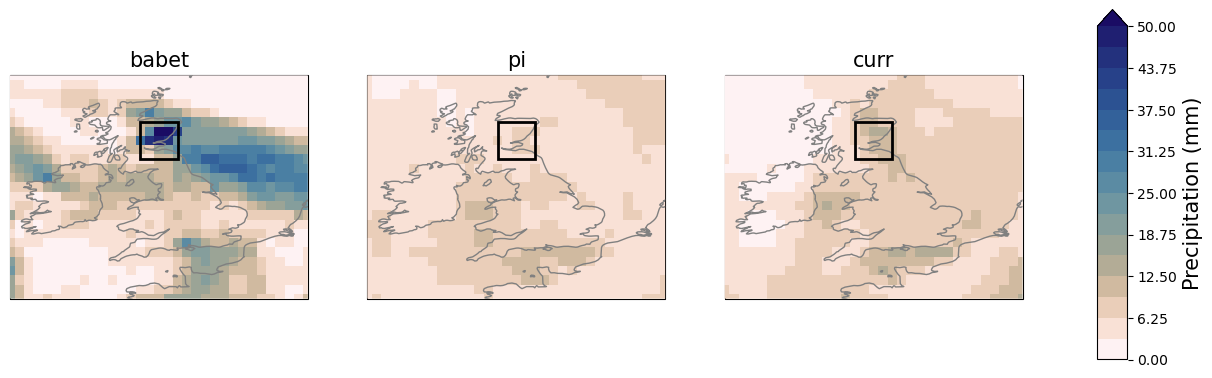

In [9]:
# figure and map setup
from numpy import add


experiments = ['babet', 'pi', 'curr']
fs = 15
projection = ccrs.PlateCarree()

tp_min = 0
tp_max = 50

fig = plt.figure(1, figsize=(15, 5))

# EPS data ------------------    
latitude = era5_all.latitude.values
longitude = era5_all.longitude.values

for e, experiment in enumerate(experiments):

    # tp_vals = era5[experiment].pr.mean(dim='time').values*1000

    ax = plt.subplot(1,3,e+1, projection = projection)
    ax.set_extent(uk, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)

    # tp as shading
    clevs_tp = np.linspace(tp_min, tp_max, 11)  # 17
    cf = (era5[experiment].pr.mean(dim='time')*1000).plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                     cmap=cm.lapaz_r, 
                                                     zorder = 10, 
                                                     levels = 17,
                                                     vmin = tp_min, vmax = tp_max,
                                                     add_colorbar=False,
                                                     extend = 'max')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Precipitation (mm)', fontsize = fs)

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


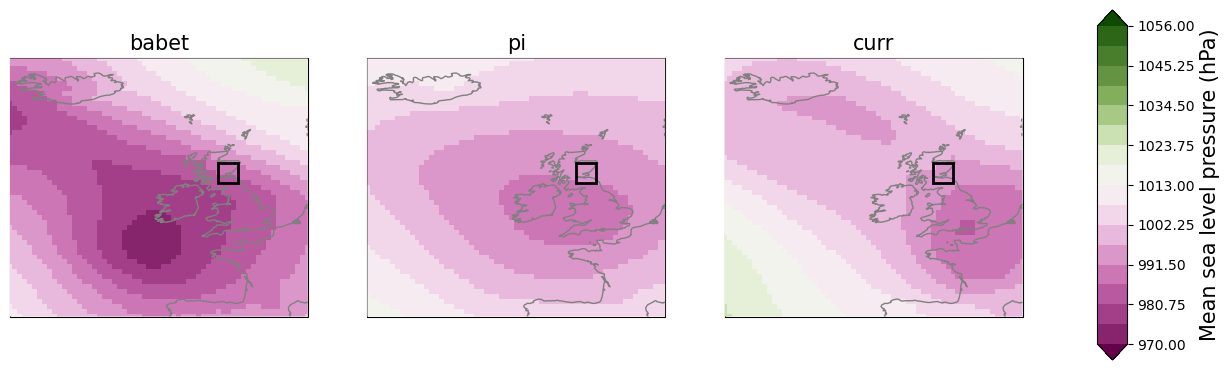

In [20]:
# figure and map setup
experiments = ['babet', 'pi', 'curr']
fs = 15
projection = ccrs.PlateCarree()

p_min = 970
p_max = 1056

fig = plt.figure(1, figsize=(15, 5))

# EPS data ------------------    
latitude = era5_all.latitude.values
longitude = era5_all.longitude.values
# Fix longitude range to [-180, 180]
longitude_wrapped = (longitude + 180) % 360 - 180


for e, experiment in enumerate(experiments):

    # tp_vals = era5[experiment].psl.mean(dim='time').values/100

    ax = plt.subplot(1,3,e+1, projection = projection)
    ax.set_extent(euroatlantic, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)
    # ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10

    # tp as shading
    clevs_tp = np.linspace(tp_min, tp_max, 11)  # 17
    # cf = ax.contourf(longitude, latitude, tp_vals, clevs_tp, cmap=cm.bam,
    #                 transform=projection, zorder = 10, extend = 'both')
    cf = (era5[experiment].psl.mean(dim='time')/100).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                            cmap=cm.bam, 
                                                            zorder = 10, 
                                                            vmin = p_min, vmax = p_max,
                                                            levels = 17,
                                                            add_colorbar=False,
                                                            extend = 'both')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Mean sea level pressure (hPa)', fontsize = fs)

In [30]:
shifted_era5 = {key : era5[key].assign_coords(lon=(((era5[key].longitude + 180) % 360) - 180)).sortby('lon').swap_dims({'longitude': 'lon'}) for key in era5.keys()}

In [16]:
tos = {key : shifted_era5[key].tos.mean(dim='time') for key in shifted_era5.keys()}

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


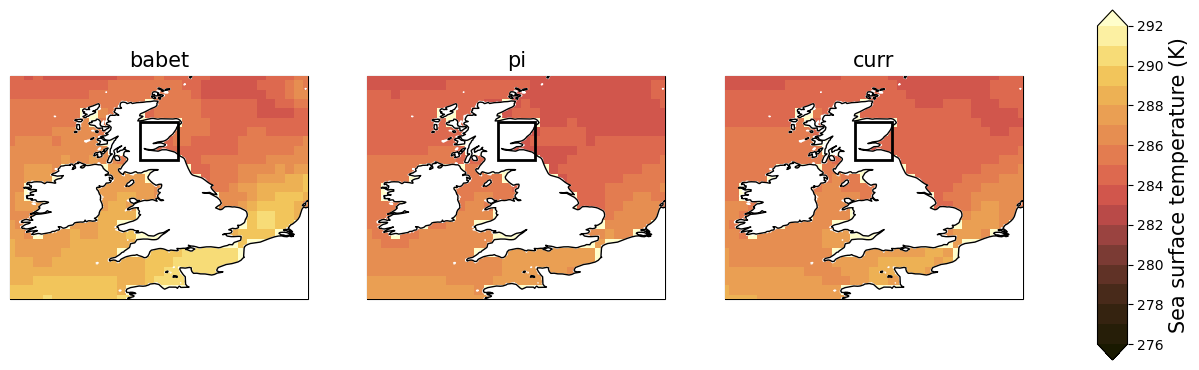

In [19]:
# figure and map setup
experiments = ['babet', 'pi', 'curr']
fs = 15
# projection = ccrs.Robinson()
projection = ccrs.PlateCarree()

tp_min = 276
tp_max = 292

fig = plt.figure(1, figsize=(15, 5))

# EPS data ------------------    
latitude = era5_all.tos.latitude.values
longitude = era5_all.tos.longitude.values
# Fix longitude range to [-180, 180]
longitude_wrapped = (longitude + 180) % 360 - 180

for e, experiment in enumerate(experiments):

    # tp_vals = tos[experiment]
    # tp_vals = np.concatenate([tp_vals[:,:]], axis=1)

    ax = plt.subplot(1,3,e+1, projection = projection)
    ax.set_extent(uk, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'black', zorder = 15)
    ax.add_feature(cfeature.LAND, zorder=14, color = 'white')  #zorder > 10

    # tp as shading
    clevs_tp = np.linspace(tp_min, tp_max, 17)  # 17
    # cf = ax.contourf(longitude_wrapped, latitude, tp_vals, clevs_tp, cmap=cm.lajolla,
    #                 transform=projection, zorder = 10, extend = 'both')
    cf = tos[experiment].plot(x= 'lon', y = 'latitude', 
                              ax=ax, transform=ccrs.PlateCarree(),
                              cmap=cm.lajolla, 
                              zorder = 10, 
                              vmin = tp_min, vmax = tp_max,
                              levels = 17,
                              add_colorbar=False,
                              extend = 'both')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Sea surface temperature (K)', fontsize = fs)

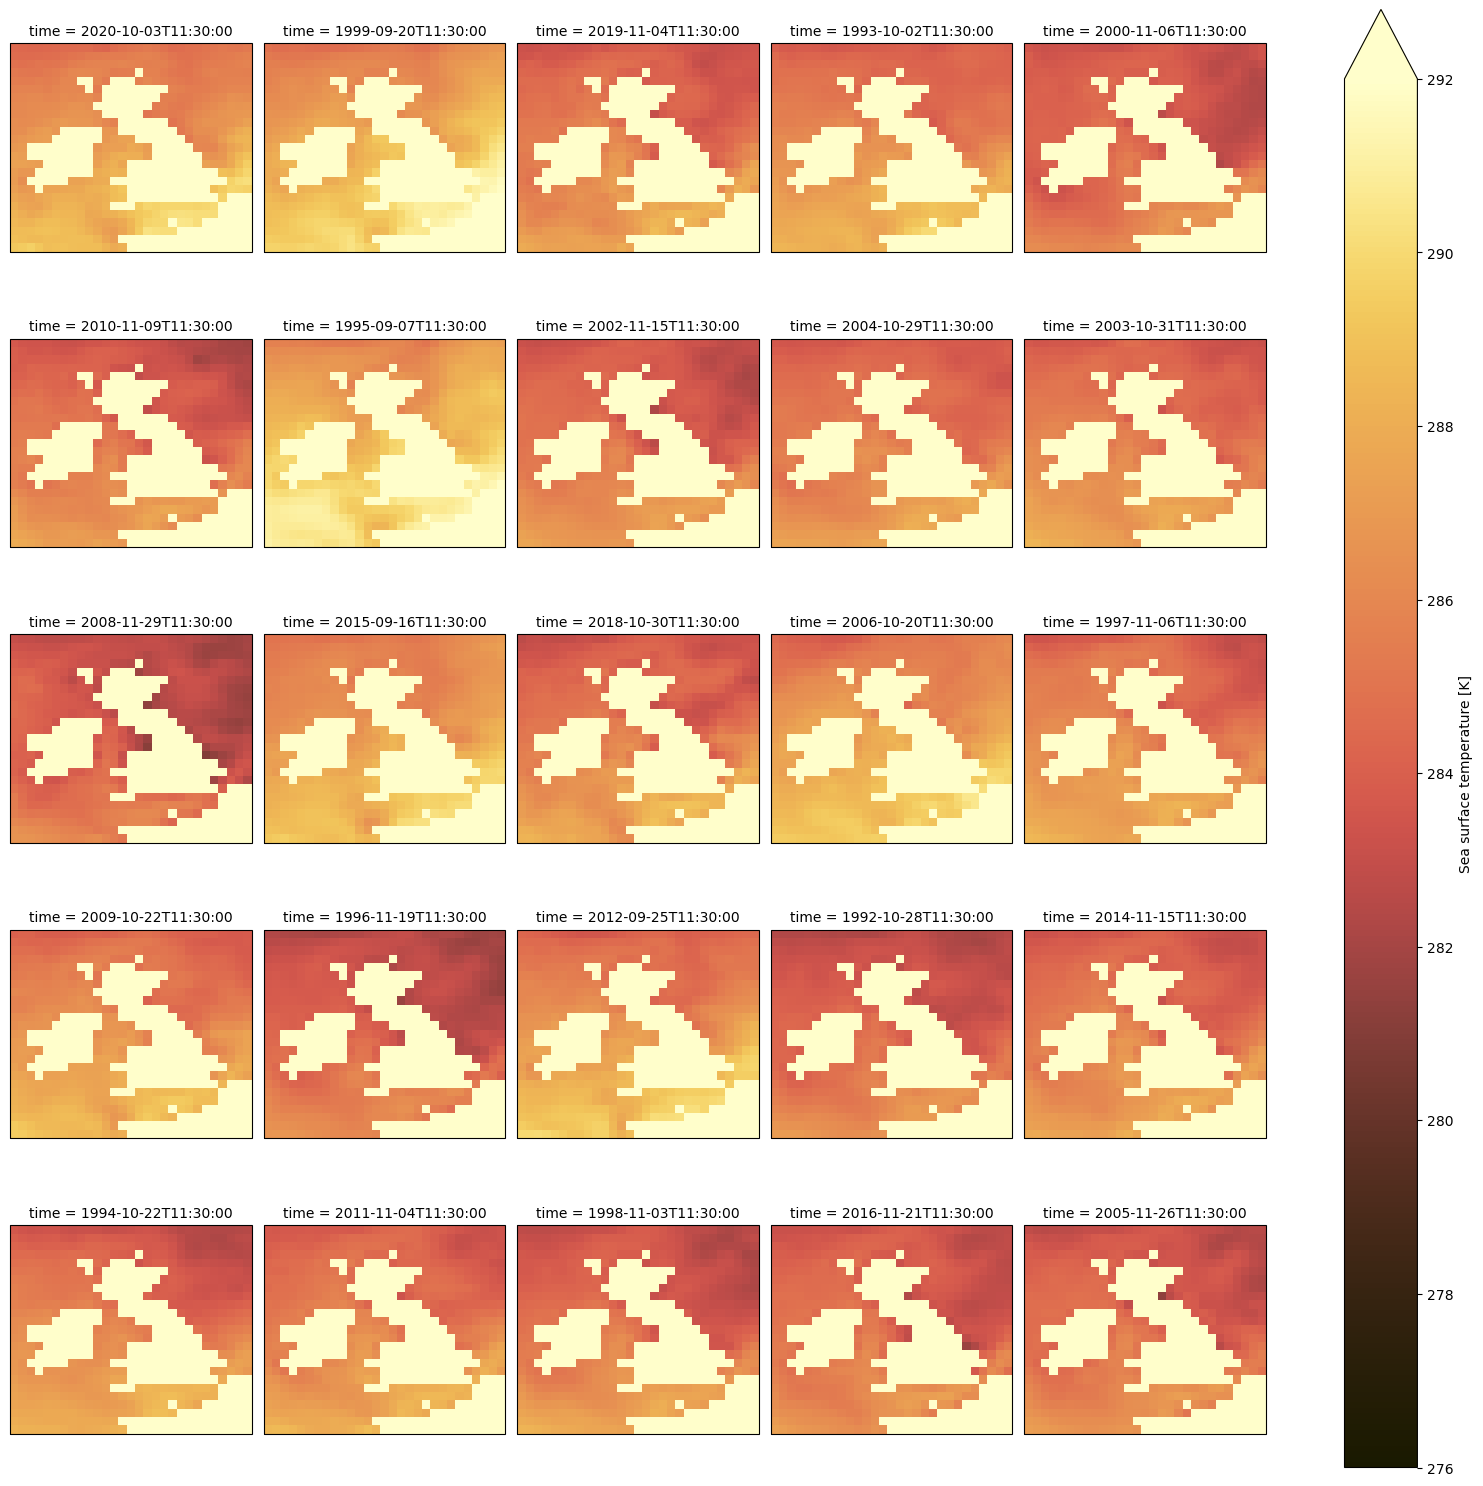

In [42]:
curr_tos = shifted_era5['curr'].tos.sel(latitude=slice(60, 48), lon=slice(-11, 3))
curr_tos.plot(col='time', 
            x = 'lon', y = 'latitude',
            subplot_kws={'projection': ccrs.PlateCarree()},
            col_wrap=5, 
            cmap=cm.lajolla, vmin=276, vmax=292)

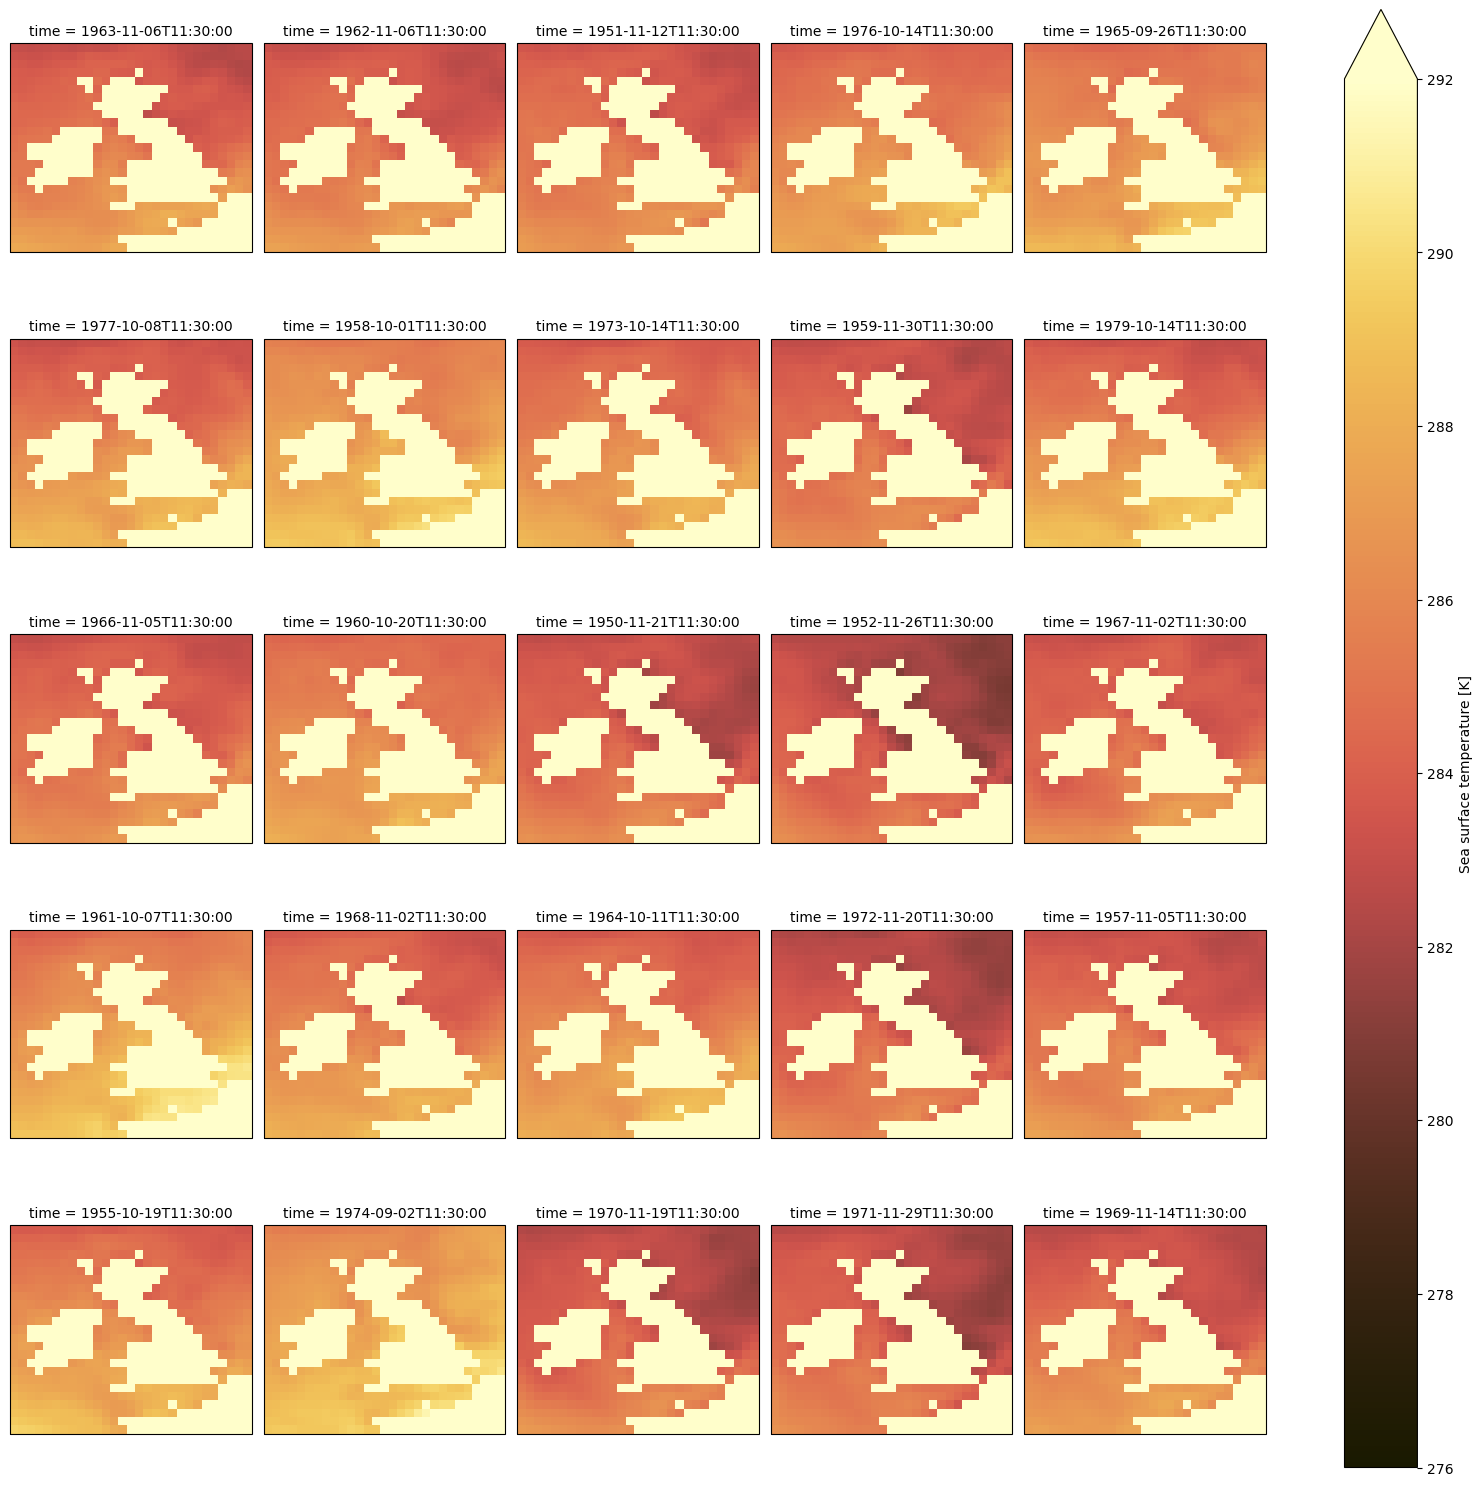

In [ ]:
pi_tos = shifted_era5['pi'].tos.sel(latitude=slice(60, 48), lon=slice(-11, 3))
pi_tos.plot(col='time', 
            x = 'lon', y = 'latitude',
            subplot_kws={'projection': ccrs.PlateCarree()},
            col_wrap=5, 
            cmap=cm.lajolla, vmin=276, vmax=292)

In [12]:
ds = era5_all.sel(time=slice('01-01-1991', '31-12-2020')).tos
# Convert the time coordinate to day-of-year (ignoring leap years)
doy = ds["time"].dt.dayofyear

# Handle leap years by dropping February 29
# ds = ds.where(~((ds["time"].dt.month == 2) & (ds["time"].dt.day == 29)), drop=True)

# Group by day-of-year and calculate the climatology
climatology = ds.groupby(doy).mean(dim="time")

# Select September 19th (day-of-year = 262)
september_19th_climatology = climatology.sel(dayofyear=262)

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


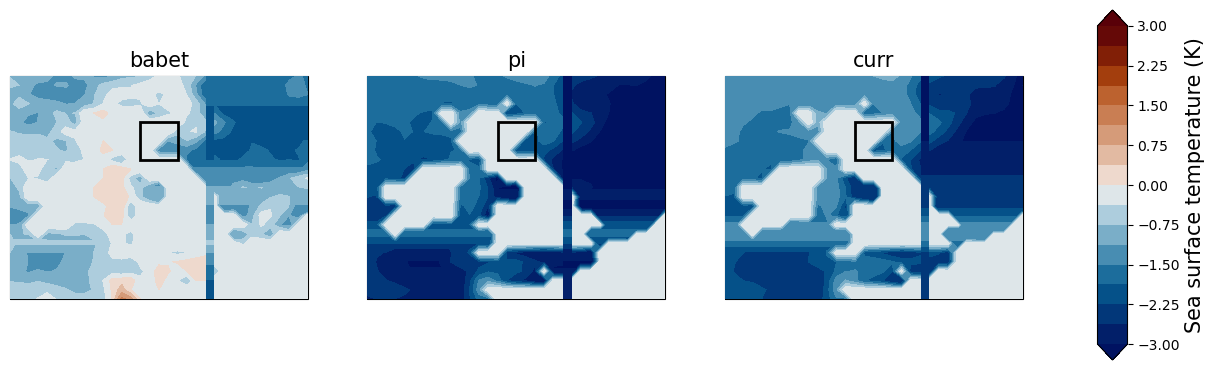

In [17]:
# Plot SST anomalies -- note that not all analogue dates are even in September

# figure and map setup
experiments = ['babet', 'pi', 'curr']
fs = 15
projection = ccrs.Robinson()

tp_min = -3
tp_max = 3

fig = plt.figure(1, figsize=(15, 5))

# EPS data ------------------    
latitude = era5_all.tos.latitude.values
longitude = era5_all.tos.longitude.values
# Fix longitude range to [-180, 180]
longitude_wrapped = (longitude + 180) % 360 - 180

for e, experiment in enumerate(experiments):

    tp_vals = tos[experiment] - september_19th_climatology
    tp_vals = np.concatenate([tp_vals[:,:]], axis=1)

    ax = plt.subplot(1,3,e+1, projection = projection)
    ax.set_extent(uk, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'black', zorder = 15)
    # ax.add_feature(cfeature.LAND, zorder=14, color = 'white')  #zorder > 10

    # tp as shading
    clevs_tp = np.linspace(tp_min, tp_max, 17)  # 17
    cf = ax.contourf(longitude_wrapped, latitude, tp_vals, clevs_tp, cmap=cm.vik,
                    transform=projection, zorder = 10, extend = 'both')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Sea surface temperature (K)', fontsize = fs)

# Distance of the analogues to the event

In [57]:
def calc_distance(f1, f2, region=[48, 60, -11, 5]):
    """
    Calculate the Euclidean distance between two fields f1 and f2
    within the region specified by region.

    Parameters
    ----------
    f1 : xarray.DataArray
        The first field
    f2 : xarray.DataArray
        The second field

    region : list [lat_min, lat_max, lon_min, lon_max]
        The region over which to calculate the distance.
    """

    # Select the region
    f1 = f1.sel(latitude=slice(region[1], region[0]), lon=slice(region[2], region[3]))
    f2 = f2.sel(latitude=slice(region[1], region[0]), lon=slice(region[2], region[3]))

    # Calculate number of grid points
    n = f1.size

    # Calculate the Euclidean distance
    euclidean_distance = np.sqrt(np.sum((f1 - f2)**2))/n
    
    return euclidean_distance

In [86]:
dates_past = ['19631106', '19621106', '19511112', '19761014', '19650926', '19771008', '19581001', '19731014', '19591130', '19791014', '19661105', '19601020', '19501121', '19521126', '19671102', '19611007', '19681102', '19641011', '19721120', '19571105', '19551019', '19740902', '19701119', '19711129', '19691114']
dates_present = ['20201003', '19990920', '20191104', '19931002', '20001106', '20101109', '19950907', '20021115', '20041029', '20031031', '20081129', '20150916', '20181030', '20061020', '19971106', '20091022', '19961119', '20120925', '19921028', '20141115', '19941022', '20111104', '19981103', '20161121', '20051126']

In [87]:
babet_psl = shifted_era5['babet'].psl.squeeze()
# past_psl = shifted_era5['pi'].psl.sel(time='19631106').squeeze()
past_psl = shifted_era5['pi'].psl.sel(time=str(dates_past[0])).squeeze()

In [ ]:
# Calculate distance between Babet and each past event
distances_pi = []
for date in dates_past:
    past_psl = shifted_era5['pi'].psl.sel(time=str(date)).squeeze()
    dist = calc_distance(babet_psl, past_psl).values
    print(f"Distance between Babet and {date}: {dist}")
    distances_pi.append(dist)

Distance between Babet and 19631106: 29.86985003067538
Distance between Babet and 19621106: 41.87217846652124
Distance between Babet and 19511112: 45.0457167096644
Distance between Babet and 19761014: 30.340997500712476
Distance between Babet and 19650926: 32.42419716505589
Distance between Babet and 19771008: 31.836651104777374
Distance between Babet and 19581001: 35.2172384897033


In [73]:
# Calculate distance between Babet and each past event
distances_curr = []
for date in dates_past:
    curr_psl = shifted_era5['curr'].psl.sel(time=str(date)).squeeze()
    distances_curr.append(calc_distance(babet_psl, curr_psl).values)

ValueError: X must have 2 or fewer dimensions

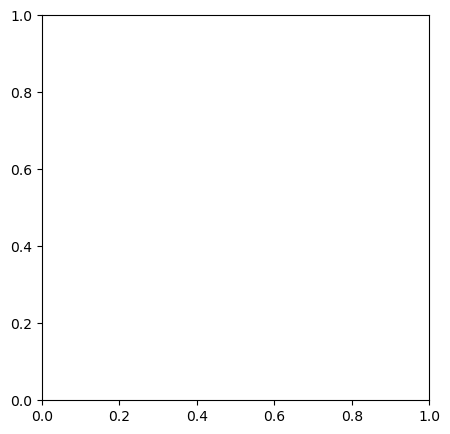

In [75]:
# Violin plots of distributions of distances
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
all_data = [distances_pi, distances_curr]

ax.violinplot([all_data], showmeans=True)
ax.set_ylabel("Euclidean distance")
ax.set_xticks([y + 1 for y in range(len(all_data))],
                labels=['pi', 'curr'])

# Comparison of ERA5 and ERA5 Land

In [9]:
base_dir = "/network/group/aopp/met_data/MET005_ERA5-LAND/data/pr/1hr/UK/pr_1hr_ERA5-Land_0.1x0.1_*"
era5land_all_pr = xr.open_mfdataset(base_dir, combine='by_coords')

In [10]:
era5land_all_pr

<xarray.Dataset>
Dimensions:    (time: 640656, latitude: 101, longitude: 91)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01T01:00:00 ... 2023-02-01
  * latitude   (latitude) float32 60.0 59.9 59.8 59.7 ... 50.3 50.2 50.1 50.0
  * longitude  (longitude) float32 -7.0 -6.9 -6.8 -6.7 -6.6 ... 1.7 1.8 1.9 2.0
Data variables:
    pr         (time, latitude, longitude) float64 dask.array<chunksize=(743, 101, 91), meta=np.ndarray>
Attributes:
    Dataset:                     ERA5-Land
    Information:                 https://confluence.ecmwf.int/display/CKB/ERA5
    Local_AOPP_contact_address:  kristian.strommen@physics.ox.ac.uk
    Naming_Conventions:          CMIP6 names are used where it was possible t...
    Regional_Coverage:           UK
    grib_code:                   228
    history:                     2023-07-10 08:58:43 GMT by grib_to_netcdf-2....
    Conventions:                 CF-1.7

In [11]:
dates_past = ['19631106', '19621106', '19511112', '19761014', '19650926', '19771008', '19581001', '19731014', '19591130', '19791014', '19661105', '19601020', '19501121', '19521126', '19671102', '19611007', '19681102', '19641011', '19721120', '19571105', '19551019', '19740902', '19701119', '19711129', '19691114']
dates_present = ['20201003', '19990920', '20191104', '19931002', '20001106', '20101109', '19950907', '20021115', '20041029', '20031031', '20081129', '20150916', '20181030', '20061020', '19971106', '20091022', '19961119', '20120925', '19921028', '20141115', '19941022', '20111104', '19981103', '20161121', '20051126']

In [56]:
def hourly2daily(ds, dates):
    selected_days = {}
    for date in dates:
        # Parse the date to calculate the range from 1 am on the selected day to midnight the next day
        start_time = f"{date}T01:00:00"
        end_time = (pd.to_datetime(date) + pd.Timedelta(days=1)).strftime('%Y%m%dT00:00:00')
        
        # Select data within this range
        daily_data = ds.sel(time=slice(start_time, end_time))
        
        # Sum the precipitation over the selected time range
        selected_days[date] = daily_data.sum(dim='time')
    return selected_days

In [67]:
# Select all timesteps for the specified dates
era5land_pr = {}
era5land_pr['pi'] = xr.concat(hourly2daily(era5land_all_pr, dates_past).values(), dim='time')
era5land_pr['curr'] = xr.concat(hourly2daily(era5land_all_pr, dates_present).values(), dim='time')

# cannot add event because not in downloaded data

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


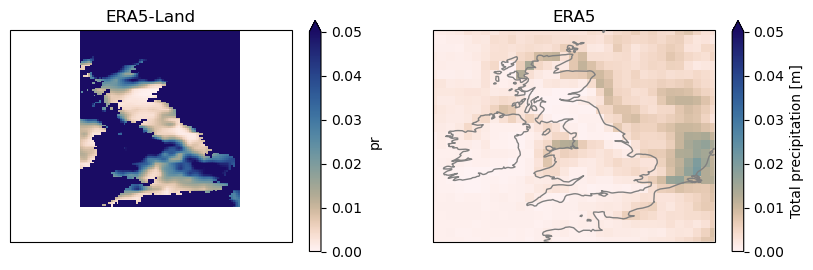

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), subplot_kw={'projection': ccrs.PlateCarree()})

test = era5land_all_pr.sel(time='2010-10-19').resample(time='1D').sum()
test.pr.plot(vmin=0, vmax=0.05, cmap=cm.lapaz_r, ax=ax[0])
ax[0].set_extent(uk, projection)
ax[0].set_title('ERA5-Land')

test2 = era5_all_pr_05.sel(time='2010-10-19')
test2.pr.plot(vmin=0, vmax=0.05, cmap=cm.lapaz_r, ax=ax[1])
ax[1].set_extent(uk, projection)
ax[1].set_title('ERA5')
ax[1].add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


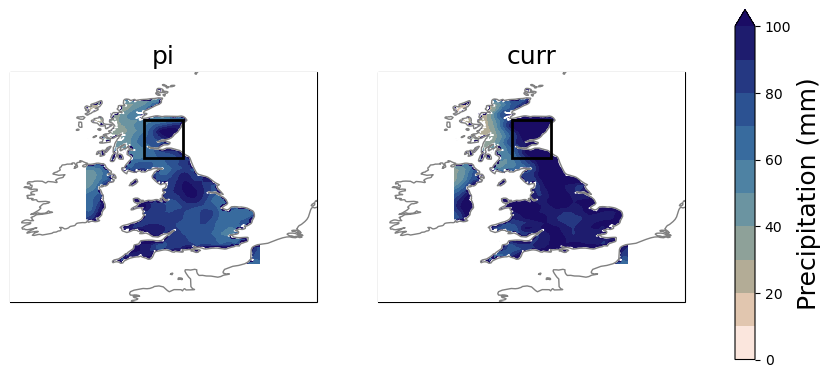

In [71]:
# figure and map setup
experiments = ['pi', 'curr']
fs = 18
projection = ccrs.PlateCarree()

tp_min = 0
tp_max = 100

fig = plt.figure(1, figsize=(10, 5))

# EPS data ------------------    
latitude = era5land_all_pr.latitude.values
longitude = era5land_all_pr.longitude.values

for e, experiment in enumerate(experiments):

    tp_vals = era5land_pr[experiment].pr.mean(dim='time').values*1000

    ax = plt.subplot(1,2,e+1, projection = projection)
    ax.set_extent(uk, projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)
    ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10

    # tp as shading
    # if experiment =='curr':
    clevs_tp = np.linspace(tp_min, tp_max, 11)  # 17
    cf = ax.contourf(longitude, latitude, tp_vals, clevs_tp, cmap=cm.lapaz_r,
                    transform=projection, zorder = 10, extend = 'max')

    # rectangle for Aberdeenshire box
    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                    edgecolor='k', 
                                    facecolor='none',
                                    transform=projection)
    ax.add_patch(rectangle)
    ax.set_title(experiment, fontsize = fs)
    rectangle.set_zorder(17)

# add colorbar
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('Precipitation (mm)', fontsize = fs)

# Irene precipitation in reforecasts

In [6]:
import xarray as xr
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
from cmcrameri import cm

date = '08-15'
reforcast_dir = f'/gf5/predict/AWH019_ERMIS_ATMICP/Irene/reforecast_date2024-{date}_date2011-{date}.grib'
test = xr.open_mfdataset(reforcast_dir).swap_dims({'step':'valid_time'})

In [7]:
# East Coast boundaries 
lat_max = 50
lat_min = 35
lon_min = -80
lon_max = -66

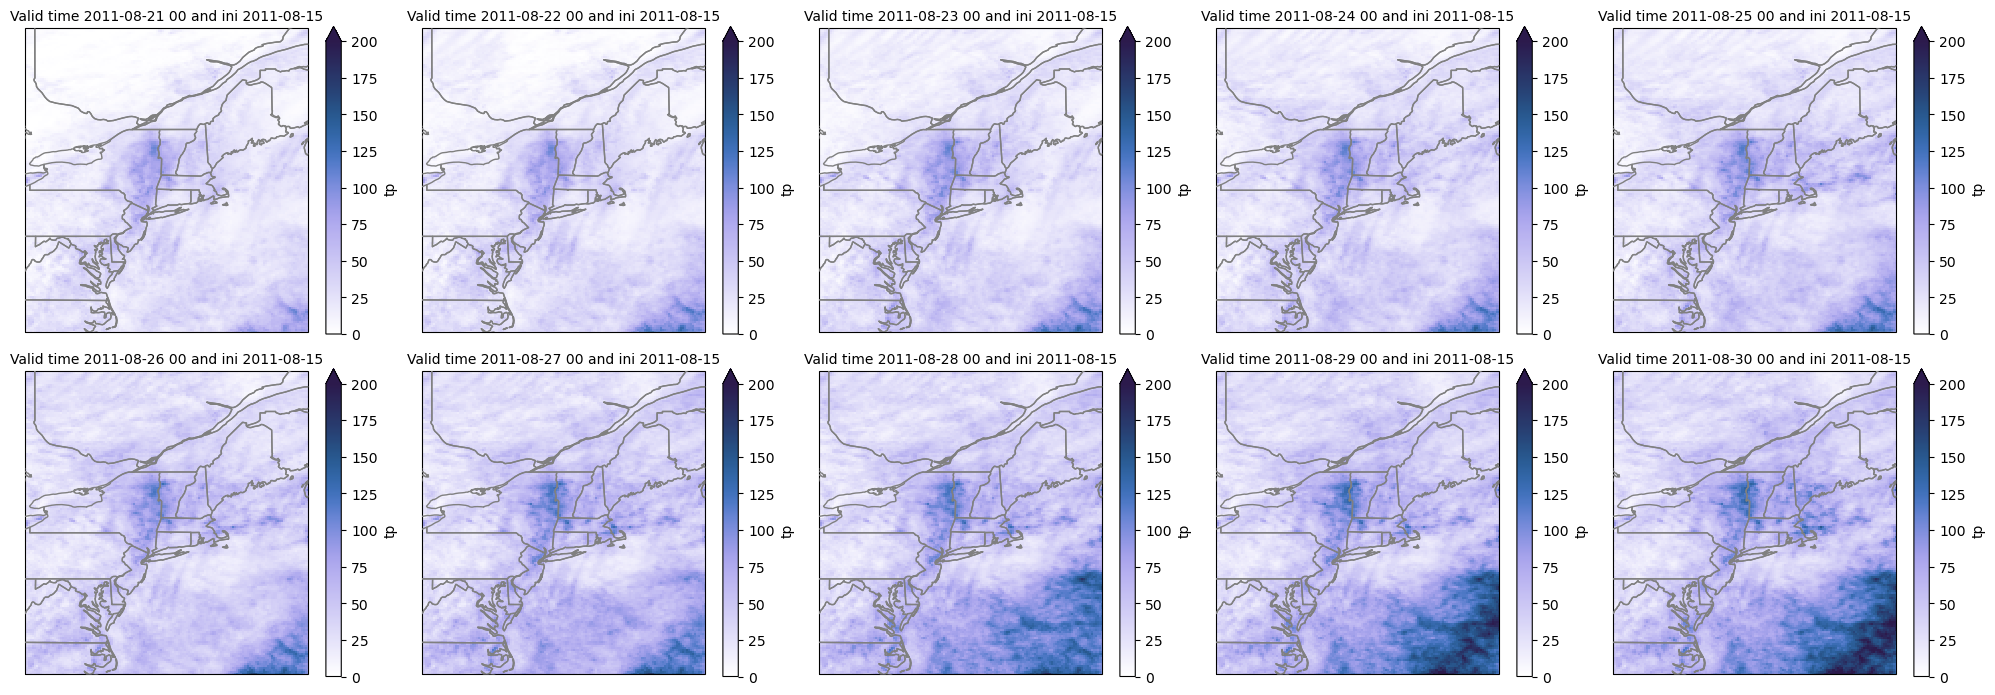

In [8]:
if date=='08-15':
    fig, ax = plt.subplots(2, 5, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 7))
    valid_times = ['2011-08-21 00','2011-08-22 00','2011-08-23 00','2011-08-24 00', '2011-08-25 00', '2011-08-26 00', '2011-08-27 00', '2011-08-28 00', '2011-08-29 00', '2011-08-30 00']
    ini = test.valid_time.values[0]

    # Convert 2D array `ax` to a flat array for easier 1D indexing
    ax = ax.flatten()

    for t in range(len(valid_times)):
        valid_time = valid_times[t]
        precip = test.tp.sel(valid_time=valid_time) * 1000 #- test.tp.sel(valid_time='2011-08-19 00') * 1000

        # Plotting
        precip.plot(ax=ax[t], transform=ccrs.PlateCarree(), vmin=0, vmax=200, cmap=cm.devon_r)
        
        # Add features to the plot
        ax[t].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', zorder=13)
        ax[t].add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', zorder=13)
        ax[t].set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        
        # Set title for each subplot
        ax[t].set_title(f'Valid time {valid_time} and ini {str(ini)[:10]}', fontsize=10)

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f'B01_irene_inidate{date}.png', dpi=300)
    # plt.savefig(f'B01_irene_inidate{date}.pdf')


In [9]:
if date=='08-26':
    fig, ax = plt.subplots(1, 5, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 3))
    valid_times = ['2011-08-26 00','2011-08-27 00','2011-08-28 00','2011-08-29 00', '2011-08-30 00']
    ini = test.valid_time.values[0]

    for t in range(len(valid_times)):
        valid_time = valid_times[t]
        precip = test.tp.sel(valid_time=valid_time) * 1000 
        # Plotting
        precip.plot(ax=ax[t], transform=ccrs.PlateCarree(), vmin=0, vmax=200, cmap=cm.devon_r)
        
        # Add features to the plot
        ax[t].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', zorder=13)
        ax[t].add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', zorder=13)
        ax[t].set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        
        # Set title for each subplot
        ax[t].set_title(f'Valid time {valid_time} and ini {str(ini)[:10]}', fontsize=10)

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f'B01_irene_inidate{date}.png', dpi=300)
    # plt.savefig(f'B01_irene_inidate{date}.pdf')

In [10]:
if date=='08-22':
    fig, ax = plt.subplots(1, 5, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 3))
    valid_times = ['2011-08-26 00','2011-08-27 00','2011-08-28 00','2011-08-29 00', '2011-08-30 00']
    ini = test.valid_time.values[0]

    for t in range(len(valid_times)):
        valid_time = valid_times[t]
        precip = test.tp.sel(valid_time=valid_time) * 1000 
        # Plotting
        precip.plot(ax=ax[t], transform=ccrs.PlateCarree(), vmin=0, vmax=200, cmap=cm.devon_r)
        
        # Add features to the plot
        ax[t].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', zorder=13)
        ax[t].add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', zorder=13)
        ax[t].set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
        
        # Set title for each subplot
        ax[t].set_title(f'Valid time {valid_time} and ini {str(ini)[:10]}', fontsize=10)

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f'B01_irene_inidate{date}.png', dpi=300)
    # plt.savefig(f'B01_irene_inidate{date}.pdf')